In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# EXPLORATORY DATA ANALYSIS
# BASIC DATA PROCESSING


data = pd.read_csv(r"C:\Users\gauta\OneDrive\Desktop\HR Analytics Project\HR-Employee-Attrition-Data.csv")

print(data.head())
print(data.info())
print(data.describe())

  Attrition  YearsAtCompany  Age              Department  Education  \
0       Yes               0   37  Research & Development          2   
1        No               0   21  Research & Development          2   
2        No               0   45  Research & Development          4   
3        No               0   23                   Sales          1   
4        No               0   22  Research & Development          3   

     EducationField  Gender  JobInvolvement  JobLevel                JobRole  \
0             Other    Male               2         1  Laboratory Technician   
1     Life Sciences    Male               3         1     Research Scientist   
2             Other    Male               3         3      Research Director   
3  Technical Degree    Male               3         1   Sales Representative   
4           Medical  Female               3         1  Laboratory Technician   

   ...  MonthlyIncome OverTime  PercentSalaryHike PerformanceRating  \
0  ...           2090

In [3]:
# CHECKING FOR NULL VALUES

print("Checking for NULL Values :\n")
print(data.isnull().sum())

Checking for NULL Values :

Attrition                  0
YearsAtCompany             0
Age                        0
Department                 0
Education                  0
EducationField             0
Gender                     0
JobInvolvement             0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
TotalWorkingYears          0
TrainingTimesLastYear      0
WorkLifeBalance            0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64


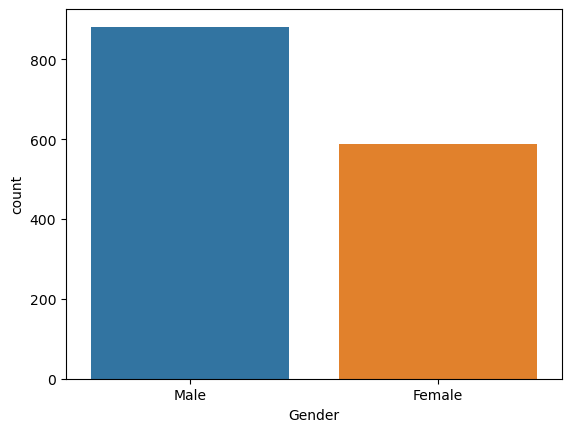

In [4]:
# DATA VISUALIZATION

sns.countplot(x='Gender', data=data)
plt.show()

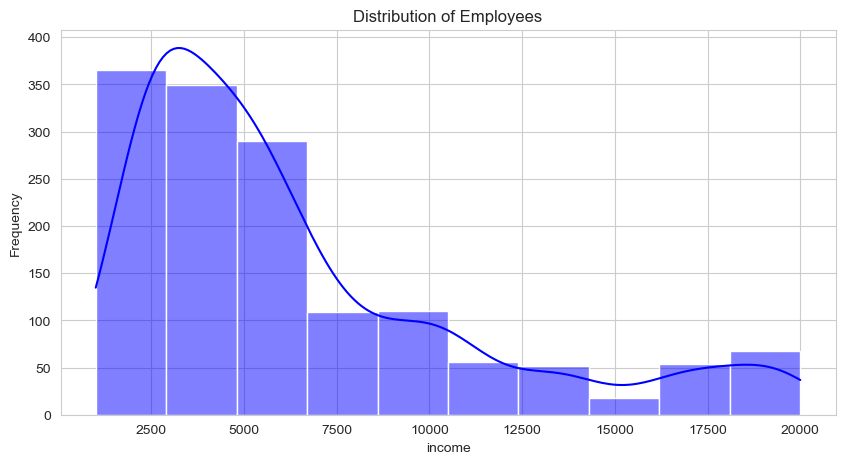

In [5]:
sns.set_style('whitegrid')

plt.figure(figsize=(10,5))
sns.histplot(data['MonthlyIncome'], kde=True, color='blue', bins=10)
plt.title('Distribution of Employees')
plt.xlabel('income')
plt.ylabel('Frequency')
plt.show()

In [7]:
# LABEL ENCODING

from sklearn.preprocessing import LabelEncoder, OneHotEncoder


label_encoders={}
categorical_columns=['Attrition','Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
for column in categorical_columns:
    label_encoders[column]=LabelEncoder()
    data[column]=label_encoders[column].fit_transform(data[column])
    
data

,Attrition,YearsAtCompany,Age,Department,Education,EducationField,Gender,JobInvolvement,JobLevel,JobRole,...,MonthlyIncome,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,0,37,1,2,4,1,2,1,2,...,2090,1,15,3,7,3,3,0,0,0
1,0,0,21,1,2,1,1,3,1,6,...,1232,0,14,3,0,6,3,0,0,0
2,0,0,45,1,4,4,1,3,3,5,...,13245,1,14,3,17,3,4,0,0,0
3,0,0,23,2,1,5,1,3,1,8,...,2322,0,13,3,3,3,3,0,0,0
4,0,0,22,1,3,3,0,3,1,2,...,2871,0,15,3,1,5,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,34,52,2,4,2,1,2,4,3,...,16856,0,11,3,34,3,4,6,1,16
1466,0,36,55,1,3,3,1,3,5,3,...,19045,1,14,3,37,2,3,10,4,13
1467,0,36,55,2,5,2,1,2,5,3,...,19586,0,21,4,36,3,3,6,2,13
1468,0,37,58,2,4,3,1,3,4,7,...,13872,0,13,3,38,1,2,10,1,8


In [8]:
# Display the encoding for each categorical feature

for column in categorical_columns:
    print(f"Encoding for {column}:")
    for i, class_label in enumerate(label_encoders[column].classes_):
        print(f"  {class_label}: {i}")
    print()

Encoding for Attrition:
  No: 0
  Yes: 1

Encoding for Department:
  Human Resources: 0
  Research & Development: 1
  Sales: 2

Encoding for EducationField:
  Human Resources: 0
  Life Sciences: 1
  Marketing: 2
  Medical: 3
  Other: 4
  Technical Degree: 5

Encoding for Gender:
  Female: 0
  Male: 1

Encoding for JobRole:
  Healthcare Representative: 0
  Human Resources: 1
  Laboratory Technician: 2
  Manager: 3
  Manufacturing Director: 4
  Research Director: 5
  Research Scientist: 6
  Sales Executive: 7
  Sales Representative: 8

Encoding for MaritalStatus:
  Divorced: 0
  Married: 1
  Single: 2

Encoding for OverTime:
  No: 0
  Yes: 1



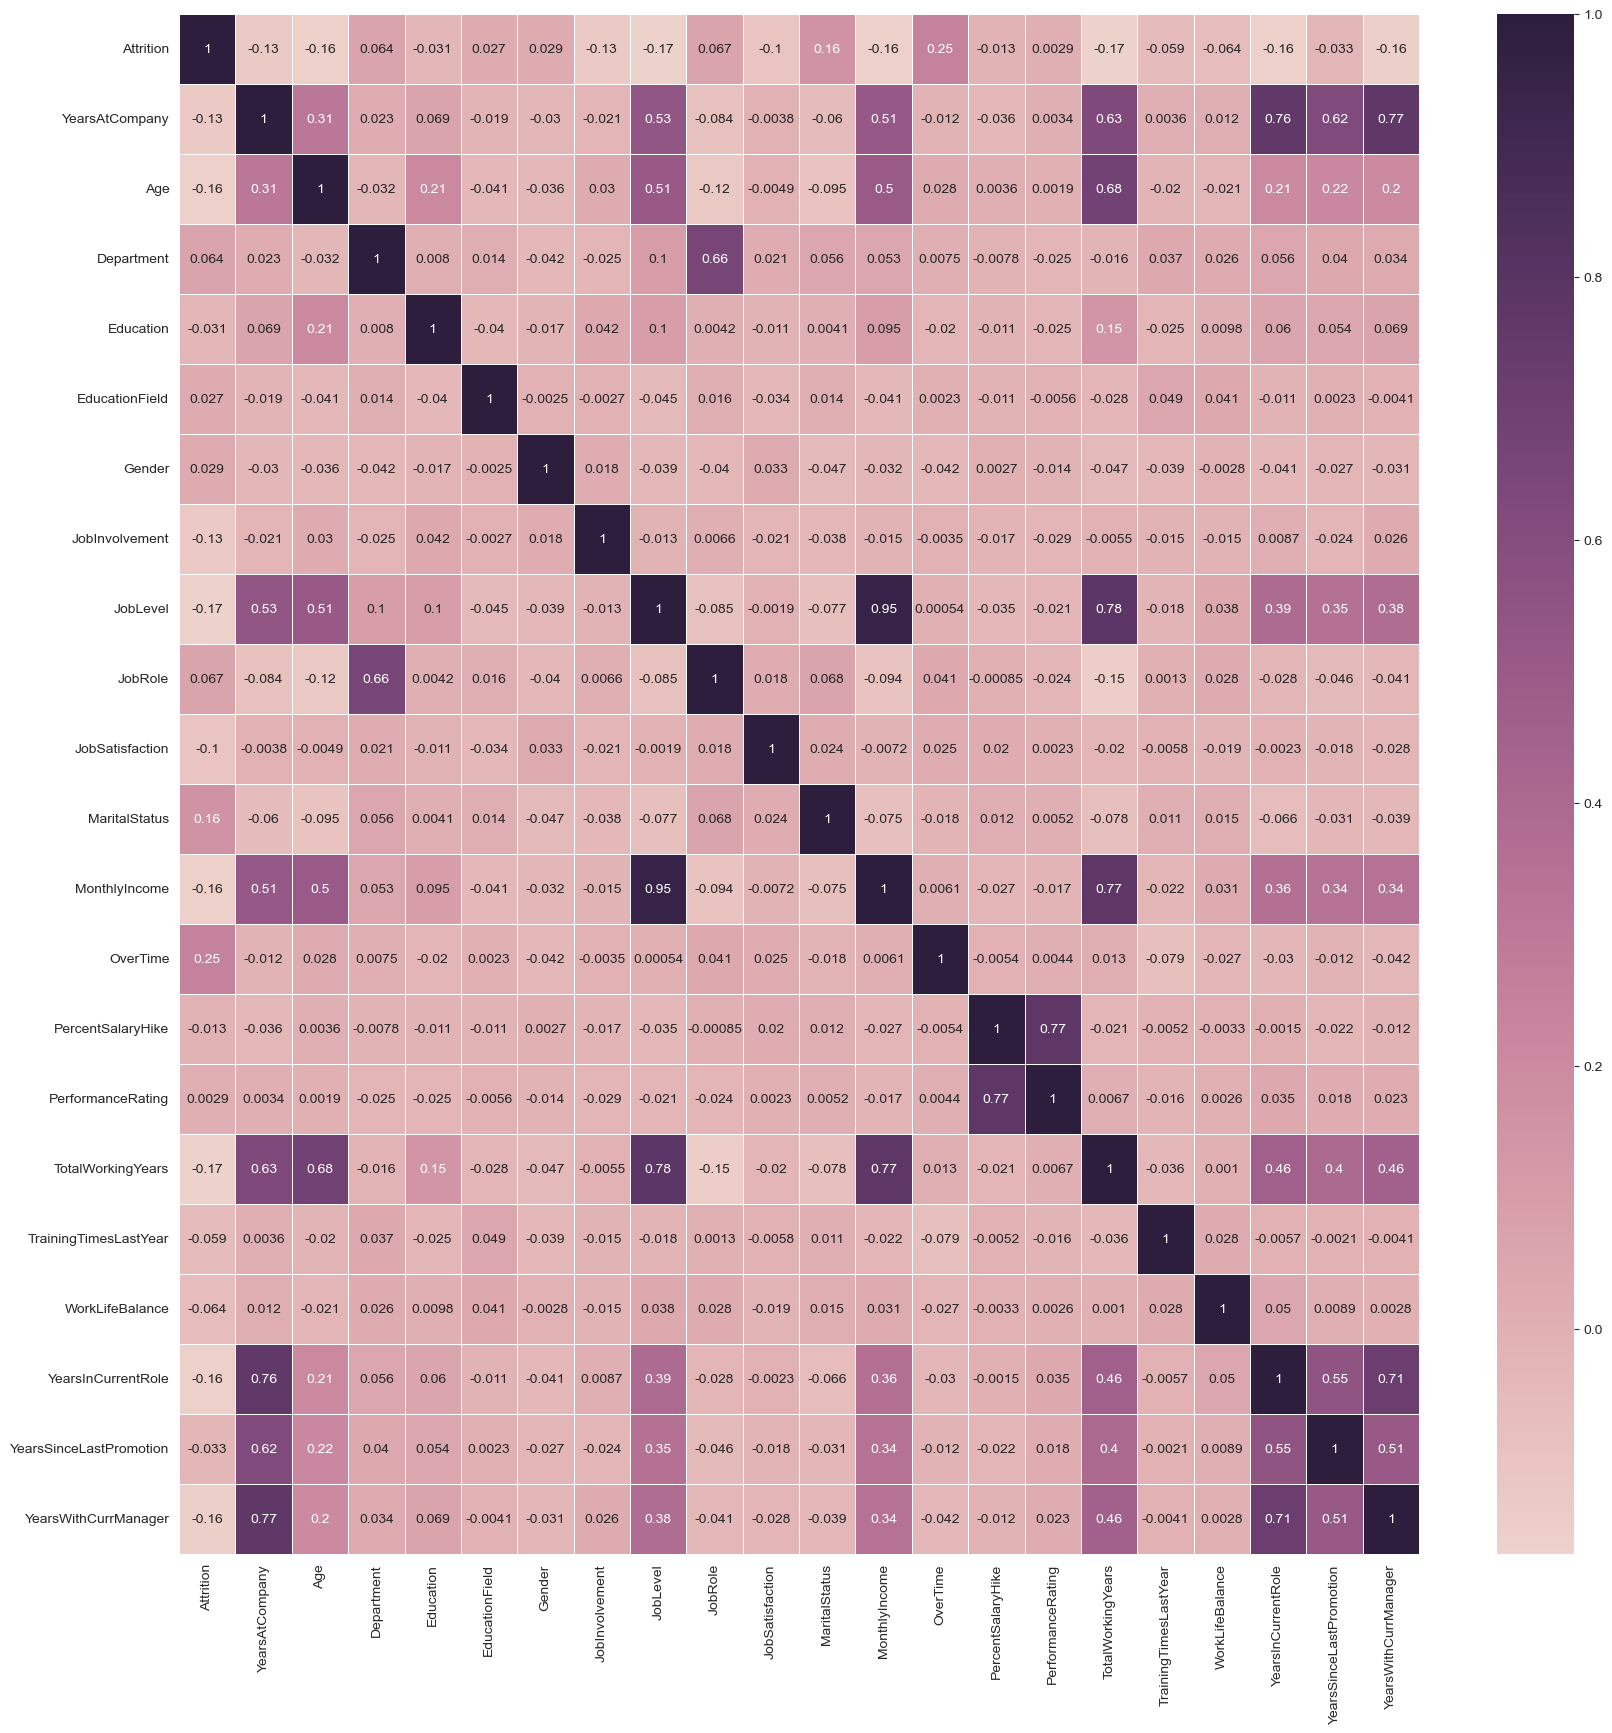

In [9]:
# CORRELATION MATRIX

fig = plt.figure(figsize=(20,20))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), linewidths=0.5, linecolor='white')
plt.show()

In [10]:
# Since MonthlyIncome is highly correlated with JobLevel (95%), removing the JobLevel Column
# Since YearsInCurrentRole is highly correlated with YearsAtCompany (95%) and YearsWithCurrentManager (78%), removing the YearsInCurrentRole Column
# Since PerformanceRating is highly correlated with PercentageSalaryHike (80%), removing the PerformanceRating Column
# Since Department is highly correlated with JobRole (78%), removing the Department Column


data_updated = data.drop(columns = ['JobLevel', 'YearsInCurrentRole', 'PerformanceRating', 'Department', 'YearsAtCompany', 'MonthlyIncome'])

data_updated

,Attrition,Age,Education,EducationField,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,YearsWithCurrManager
0,1,37,2,4,1,2,2,3,2,1,15,7,3,3,0,0
1,0,21,2,1,1,3,6,4,2,0,14,0,6,3,0,0
2,0,45,4,4,1,3,5,1,1,1,14,17,3,4,0,0
3,0,23,1,5,1,3,8,1,0,0,13,3,3,3,0,0
4,0,22,3,3,0,3,2,4,2,0,15,1,5,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,52,4,2,1,2,3,1,1,0,11,34,3,4,1,16
1466,0,55,3,3,1,3,3,1,2,1,14,37,2,3,4,13
1467,0,55,5,2,1,2,3,4,1,0,21,36,3,3,2,13
1468,0,58,4,3,1,3,7,3,2,0,13,38,1,2,1,8


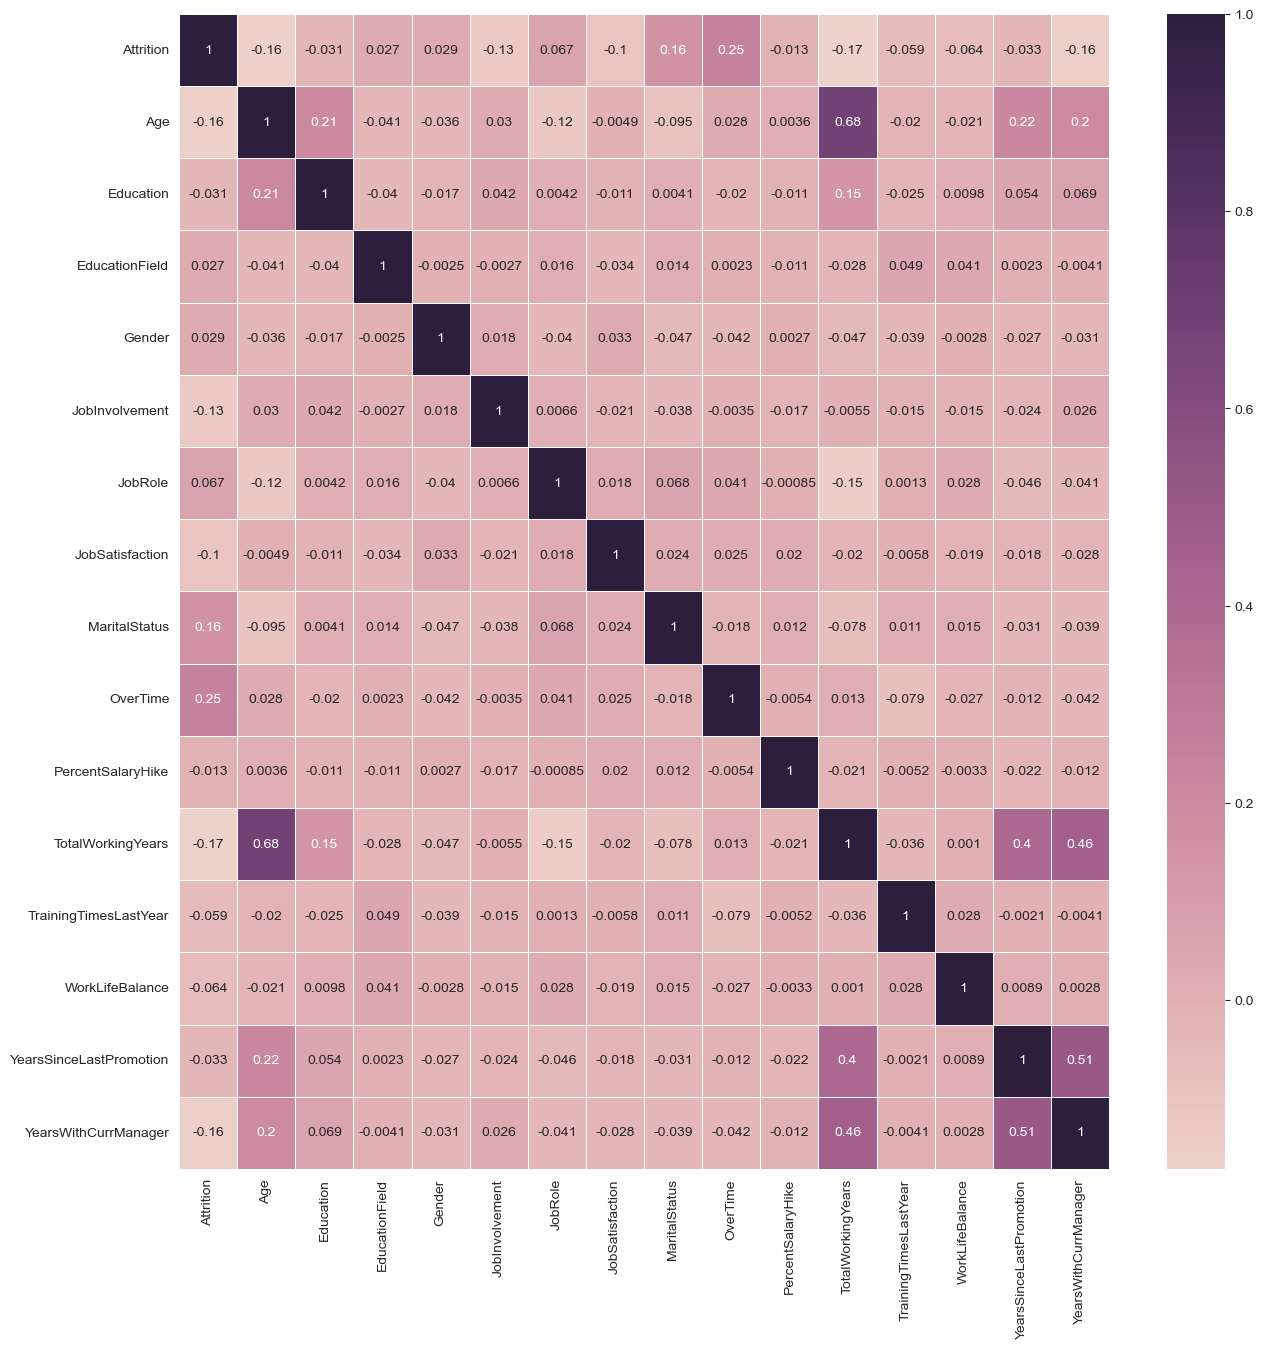

Attrition                  1.000000
OverTime                   0.246118
MaritalStatus              0.162070
JobRole                    0.067151
Gender                     0.029453
EducationField             0.026846
PercentSalaryHike         -0.013478
Education                 -0.031373
YearsSinceLastPromotion   -0.033019
TrainingTimesLastYear     -0.059478
WorkLifeBalance           -0.063939
JobSatisfaction           -0.103481
JobInvolvement            -0.130016
YearsWithCurrManager      -0.156199
Age                       -0.159205
TotalWorkingYears         -0.171063
Name: Attrition, dtype: float64


In [11]:
# CORRELATION MATRIX OF UPDATED DATAFRAME

fig = plt.figure(figsize=(15,15))
corr = data_updated.corr()
sns.heatmap(corr, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), linewidths=0.5, linecolor='white')
plt.show()


# Find features highly correlated with the target
target_corr = corr['Attrition'].sort_values(ascending=False)
print(target_corr)

In [12]:
# SELECTING TOP FEATURES FROM THE DATASET

from sklearn.feature_selection import SelectKBest, chi2

X = data_updated.drop('Attrition', axis=1)
y = data_updated['Attrition']

# Apply SelectKBest class
bestfeatures = SelectKBest(score_func=chi2, k='all')  # or specify a number
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Combine the two dataframes
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.sort_values(by='Score', ascending=False))



                    Feature       Score
10        TotalWorkingYears  230.721618
14     YearsWithCurrManager  110.671534
0                       Age   84.155277
8                  OverTime   63.845067
7             MaritalStatus   18.745657
5                   JobRole    9.004448
13  YearsSinceLastPromotion    7.601723
6           JobSatisfaction    7.011947
4            JobInvolvement    4.605616
11    TrainingTimesLastYear    3.085796
12          WorkLifeBalance    1.085543
2            EducationField    0.834912
1                 Education    0.520642
3                    Gender    0.510087
9         PercentSalaryHike    0.235027


In [13]:
# Splitting the dataset
X = data_updated.drop('Attrition', axis=1)
y = data_updated['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Convert x_train and x_test to NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

# Classification algorithms
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),  # Increased max_iter
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}


In [14]:
# FEATURE ENGINEERING


from sklearn.model_selection import train_test_split

# Assuming X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Import necessary libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Feature scaling
scaler = StandardScaler()  # or use MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature selection using Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=10)  # select top 10 features
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)


X_test = np.array(X_test)
X_train = np.array(X_train)



Training Logistic Regression...


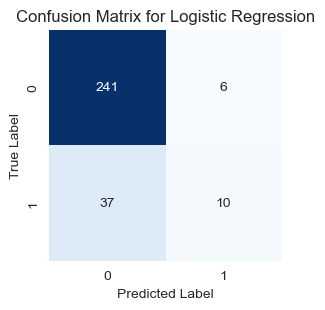

Logistic Regression Accuracy: 85.37 %
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       247
           1       0.62      0.21      0.32        47

    accuracy                           0.85       294
   macro avg       0.75      0.59      0.62       294
weighted avg       0.83      0.85      0.82       294

-----------------------------------------------------------
Training Decision Tree...


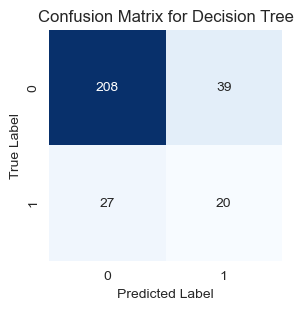

Decision Tree Accuracy: 77.55 %
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       247
           1       0.34      0.43      0.38        47

    accuracy                           0.78       294
   macro avg       0.61      0.63      0.62       294
weighted avg       0.80      0.78      0.79       294

-----------------------------------------------------------
Training Random Forest...


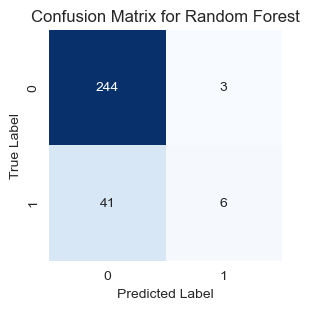

Random Forest Accuracy: 85.03 %
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       247
           1       0.67      0.13      0.21        47

    accuracy                           0.85       294
   macro avg       0.76      0.56      0.57       294
weighted avg       0.83      0.85      0.80       294

-----------------------------------------------------------
Training Support Vector Machine...


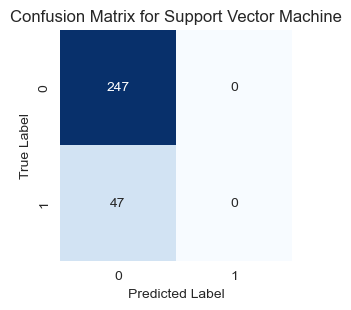

Support Vector Machine Accuracy: 84.01 %
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

-----------------------------------------------------------
Training Naive Bayes...


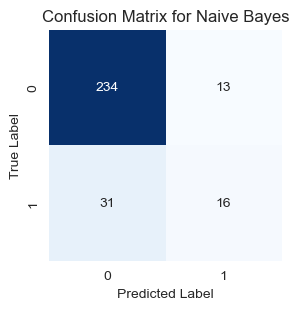

Naive Bayes Accuracy: 85.03 %
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       247
           1       0.55      0.34      0.42        47

    accuracy                           0.85       294
   macro avg       0.72      0.64      0.67       294
weighted avg       0.83      0.85      0.84       294

-----------------------------------------------------------
Training K-Nearest Neighbors...


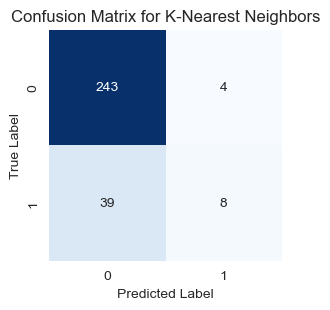

K-Nearest Neighbors Accuracy: 85.37 %
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       247
           1       0.67      0.17      0.27        47

    accuracy                           0.85       294
   macro avg       0.76      0.58      0.59       294
weighted avg       0.83      0.85      0.82       294

-----------------------------------------------------------
Summary of model accuracies:
Logistic Regression: 85.37 %
Decision Tree: 77.55 %
Random Forest: 85.03 %
Support Vector Machine: 84.01 %
Naive Bayes: 85.03 %
K-Nearest Neighbors: 85.37 %


In [15]:
# # TRAINING AND EVALUATING CLASSIFIERS

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
    
# Training and evaluating classifiers
results = {}
for name, clf in classifiers.items():
    print(f"Training {name}...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix using seaborn heatmap
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f'{name} Accuracy: {accuracy * 100:.2f} %')
    print(classification_report(y_test, y_pred, zero_division=0))
    print("-----------------------------------------------------------")

# Print summary of results
print("Summary of model accuracies:")
for name, accuracy in results.items():
    print(f'{name}: {accuracy * 100:.2f} %')

In [16]:
# Finding the best classifier

best_classifier = max(results, key=results.get)
print(f'Best Classifier: {best_classifier} with Accuracy: {results[best_classifier]:.4f}')

Best Classifier: Logistic Regression with Accuracy: 0.8537


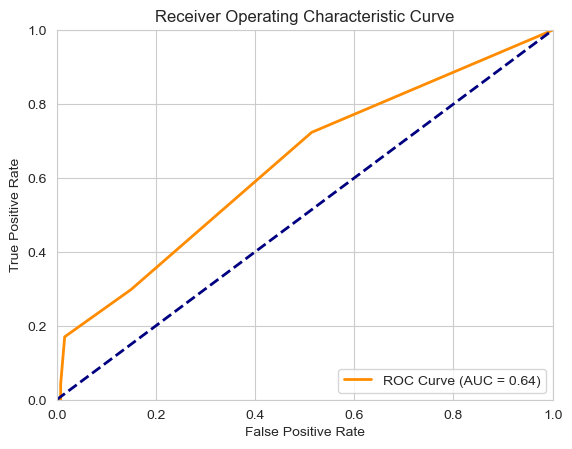

In [17]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Ensure clf is already trained and X_test, y_test are correctly defined
# Calculate ROC Curve
y_pred_prob = clf.predict_proba(X_test)[:, 1]  # Assuming binary classification
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()


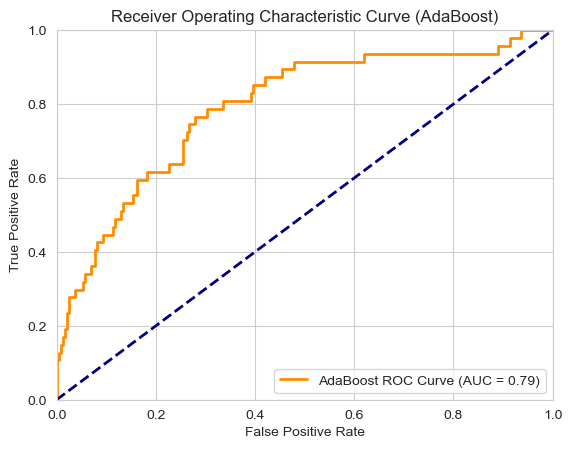

AdaBoost Accuracy: 85.71 %
Confusion Matrix for AdaBoost:
[[245   2]
 [ 40   7]]


<Figure size 600x600 with 0 Axes>

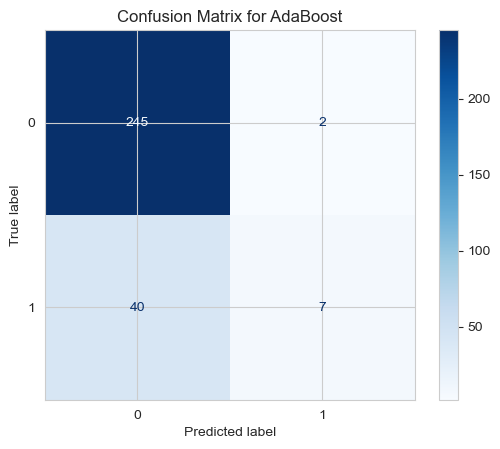

Classification Report for AdaBoost:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       247
           1       0.78      0.15      0.25        47

    accuracy                           0.86       294
   macro avg       0.82      0.57      0.59       294
weighted avg       0.85      0.86      0.81       294



In [18]:
# USING ADABOOST TO BOOST THE PERFORMANCE OF THE MODEL

from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')

# Initialize AdaBoost with Logistic Regression as base estimator
ada_boost = AdaBoostClassifier(base_estimator=log_reg, n_estimators=50, random_state=42)

# Fit AdaBoost
ada_boost.fit(X_train, y_train)

# Predict probabilities
y_prob_ada = ada_boost.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_prob_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)

# Plot ROC curve for AdaBoost
plt.figure()
plt.plot(fpr_ada, tpr_ada, color='darkorange', lw=2, label=f'AdaBoost ROC Curve (AUC = {roc_auc_ada:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve (AdaBoost)')
plt.legend(loc="lower right")
plt.show()

# Predict class labels
y_pred_ada = ada_boost.predict(X_test)

# Compute accuracy
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f'AdaBoost Accuracy: {accuracy_ada * 100:.2f} %')

# Compute confusion matrix
cm_ada = confusion_matrix(y_test, y_pred_ada)
print(f'Confusion Matrix for AdaBoost:\n{cm_ada}')

# Display confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
ConfusionMatrixDisplay(confusion_matrix=cm_ada, display_labels=ada_boost.classes_).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for AdaBoost')
plt.show()

# Print classification report
print('Classification Report for AdaBoost:')
print(classification_report(y_test, y_pred_ada, zero_division=0))



[0.16072379 0.04799697 0.06116541 0.02436558 0.03298236 0.06947848
 0.06889867 0.04302605 0.04475906 0.09667687 0.12236165 0.04241654
 0.04394365 0.0454758  0.09572914]


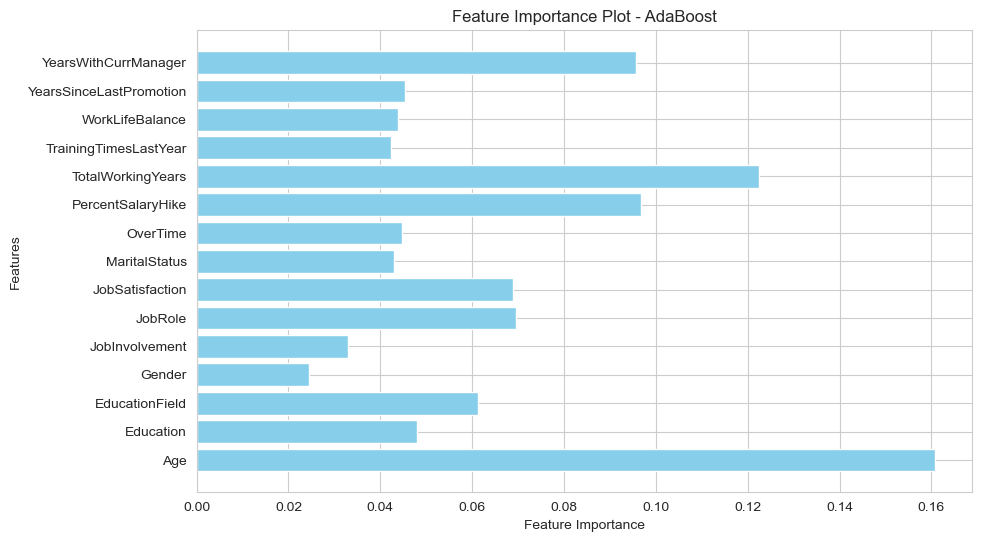

In [19]:
# PLOTTING FEATURE IMPORTANCE

# Prepare the feature names list
list1 = data_updated.columns[1:]

# Initialize the base estimator
base = DecisionTreeClassifier(max_depth=5, random_state=42)

# Initialize the AdaBoost classifier with the DecisionTree as the base estimator
adaboost_clf = AdaBoostClassifier(base_estimator=base, n_estimators=50, random_state=42)

# Fit the model
adaboost_clf.fit(X_train, y_train)

print(adaboost_clf.feature_importances_)

# Get feature importances
importances = adaboost_clf.feature_importances_

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(list1, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot - AdaBoost')
plt.show()

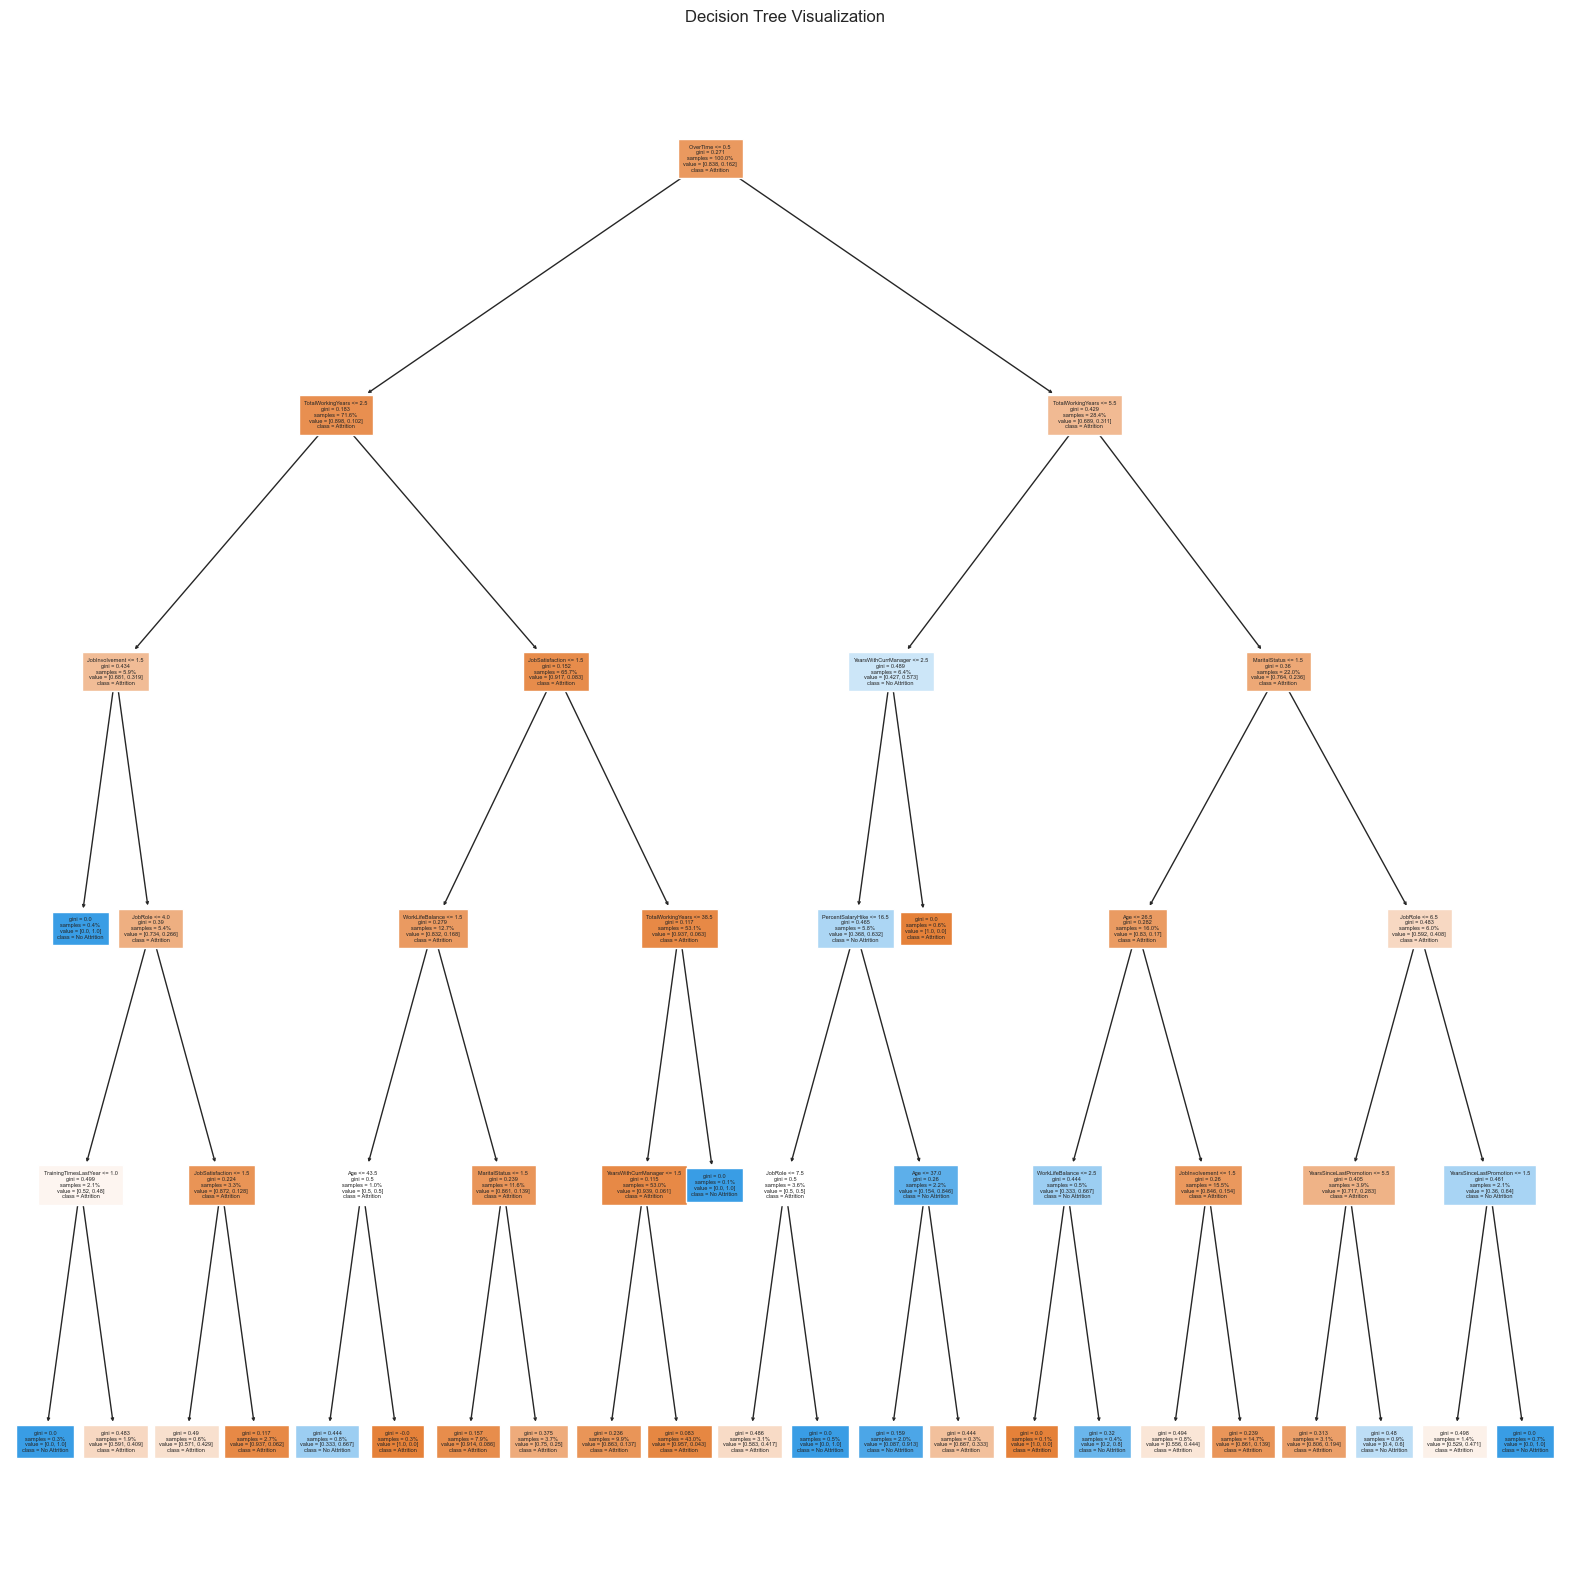

In [20]:
# Plot the decision tree

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming `X` is your feature matrix (DataFrame or array)
feature_names = X.columns.tolist()  # If X is a DataFrame, get the column names

# Plot the first decision tree in the AdaBoost ensemble
plt.figure(figsize=(20, 20))
plot_tree(adaboost_clf.estimators_[0], 
          feature_names=feature_names, 
          filled=True, 
          class_names=['Attrition', 'No Attrition'],  # Ensure these match your actual class labels
          fontsize=4, # Increase the font size
          proportion=True)  # Proportion the size of the boxes to the number of samples
plt.title("Decision Tree Visualization")
plt.show()
